<a href="https://colab.research.google.com/github/soobin2121/ML_EDU/blob/master/seaborn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tips=sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


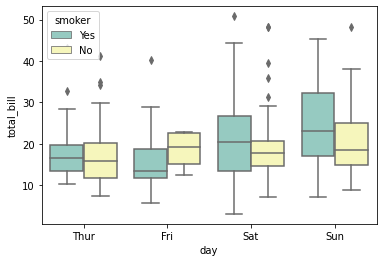

In [3]:
sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips,palette='Set3')
plt.show()

#seaborn grid
###multi-plot grid로 여러가지 조건부 관계를 동시에 플롯팅
- facetgrid, pairgrid, jointgrid

###facetgrid
-FacetGrid(data, row, col, hue) : 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class이다.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


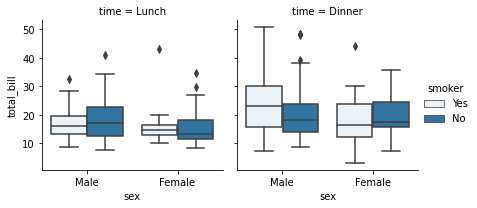

In [4]:
g= sns.FacetGrid(tips, col='time')     #time을 기준으로 나눌 것
g.map(sns.boxplot, 'sex','total_bill','smoker').add_legend(title='smoker')  #map 함수를 이용해서 어떤 그래프를 그릴 것인지

plt.show()

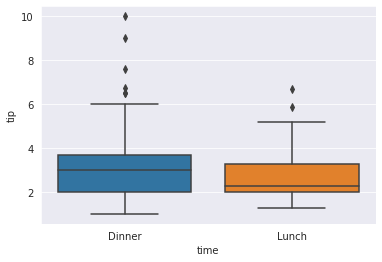

In [5]:
sns.set_style('darkgrid')    #배경의 옵션 = whitegrid,dark,white,ticks

sns.boxplot(x='time',y='tip',data=tips,order=['Dinner','Lunch'])
plt.show()

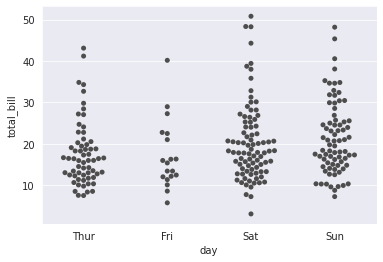

In [6]:
#데이터가 모여있는 정도를 알수있음.

sns.swarmplot(x='day',y='total_bill',data=tips,color='.3')
plt.show()

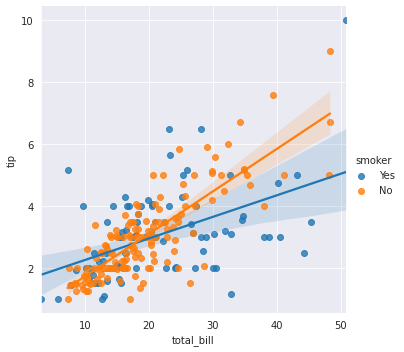

In [7]:
sns.lmplot(x='total_bill',y='tip',hue='smoker', data=tips)
plt.show()

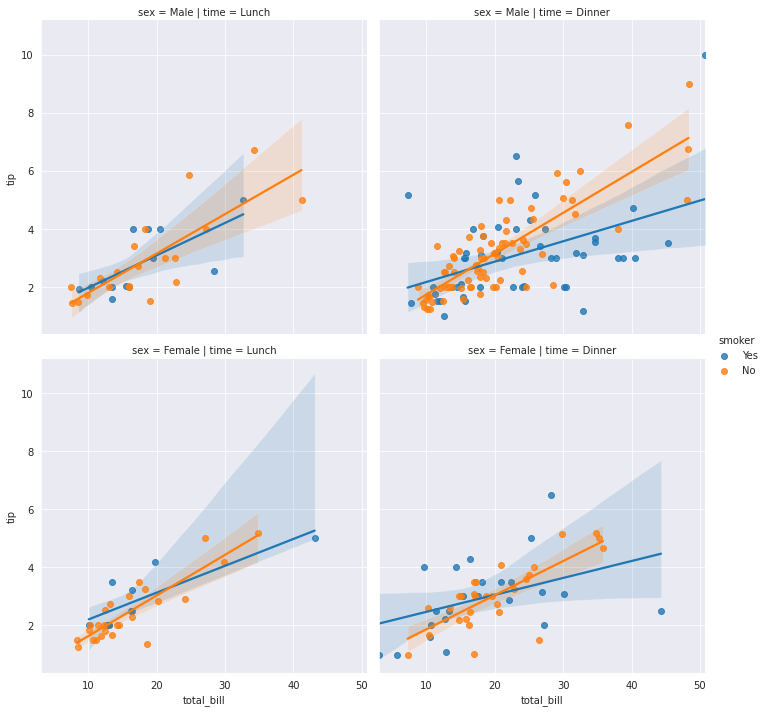

In [8]:
sns.lmplot(x='total_bill',y='tip',row='sex',col='time',hue='smoker', data=tips)
plt.show()

In [9]:
fly=sns.load_dataset('flights')
fly.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [10]:
flys=fly.pivot('month','year','passengers')
flys.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419


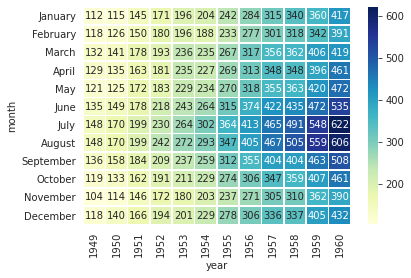

In [11]:
sns.heatmap(flys,annot=True, fmt='d', cmap="YlGnBu",linewidths=.5)    #정수형식으로 주석추가, 색상변경, 줄 간격 넓힘

In [12]:
iris= sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


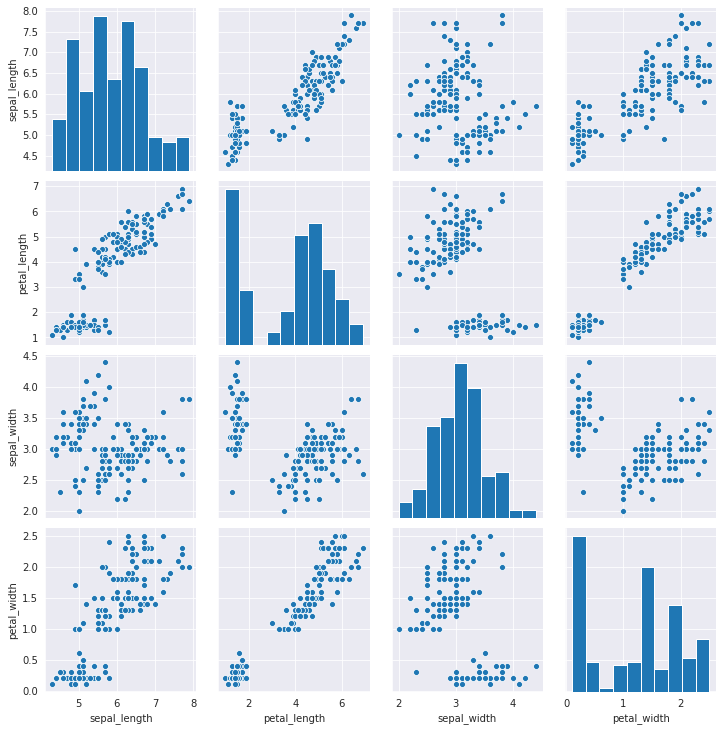

In [13]:
sns.pairplot(iris,vars=['sepal_length','petal_length','sepal_width','petal_width'])   #각 변수별 상관관계를 나타내줌
plt.show()

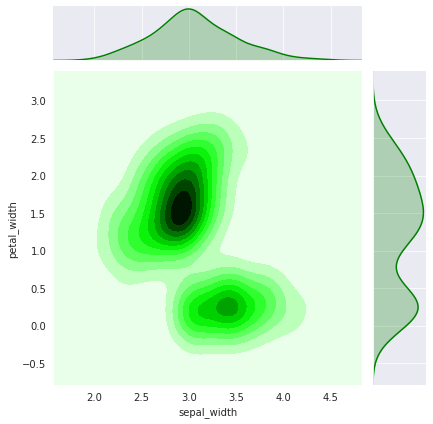

In [14]:
sns.jointplot('sepal_width','petal_width',data=iris,kind='kde',color='g')
plt.show()

### 데이터 불러오기

In [15]:
from google.colab import files
uploaded = files.upload()

Saving 01. CCTV_in_Seoul.csv to 01. CCTV_in_Seoul (1).csv


In [16]:
 import pandas as pd
 import io

df2 = pd.read_csv(io.BytesIO(uploaded['01. CCTV_in_Seoul.csv']))


In [17]:
df2.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 한글 깨짐 해결__런타임 다시 실행

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


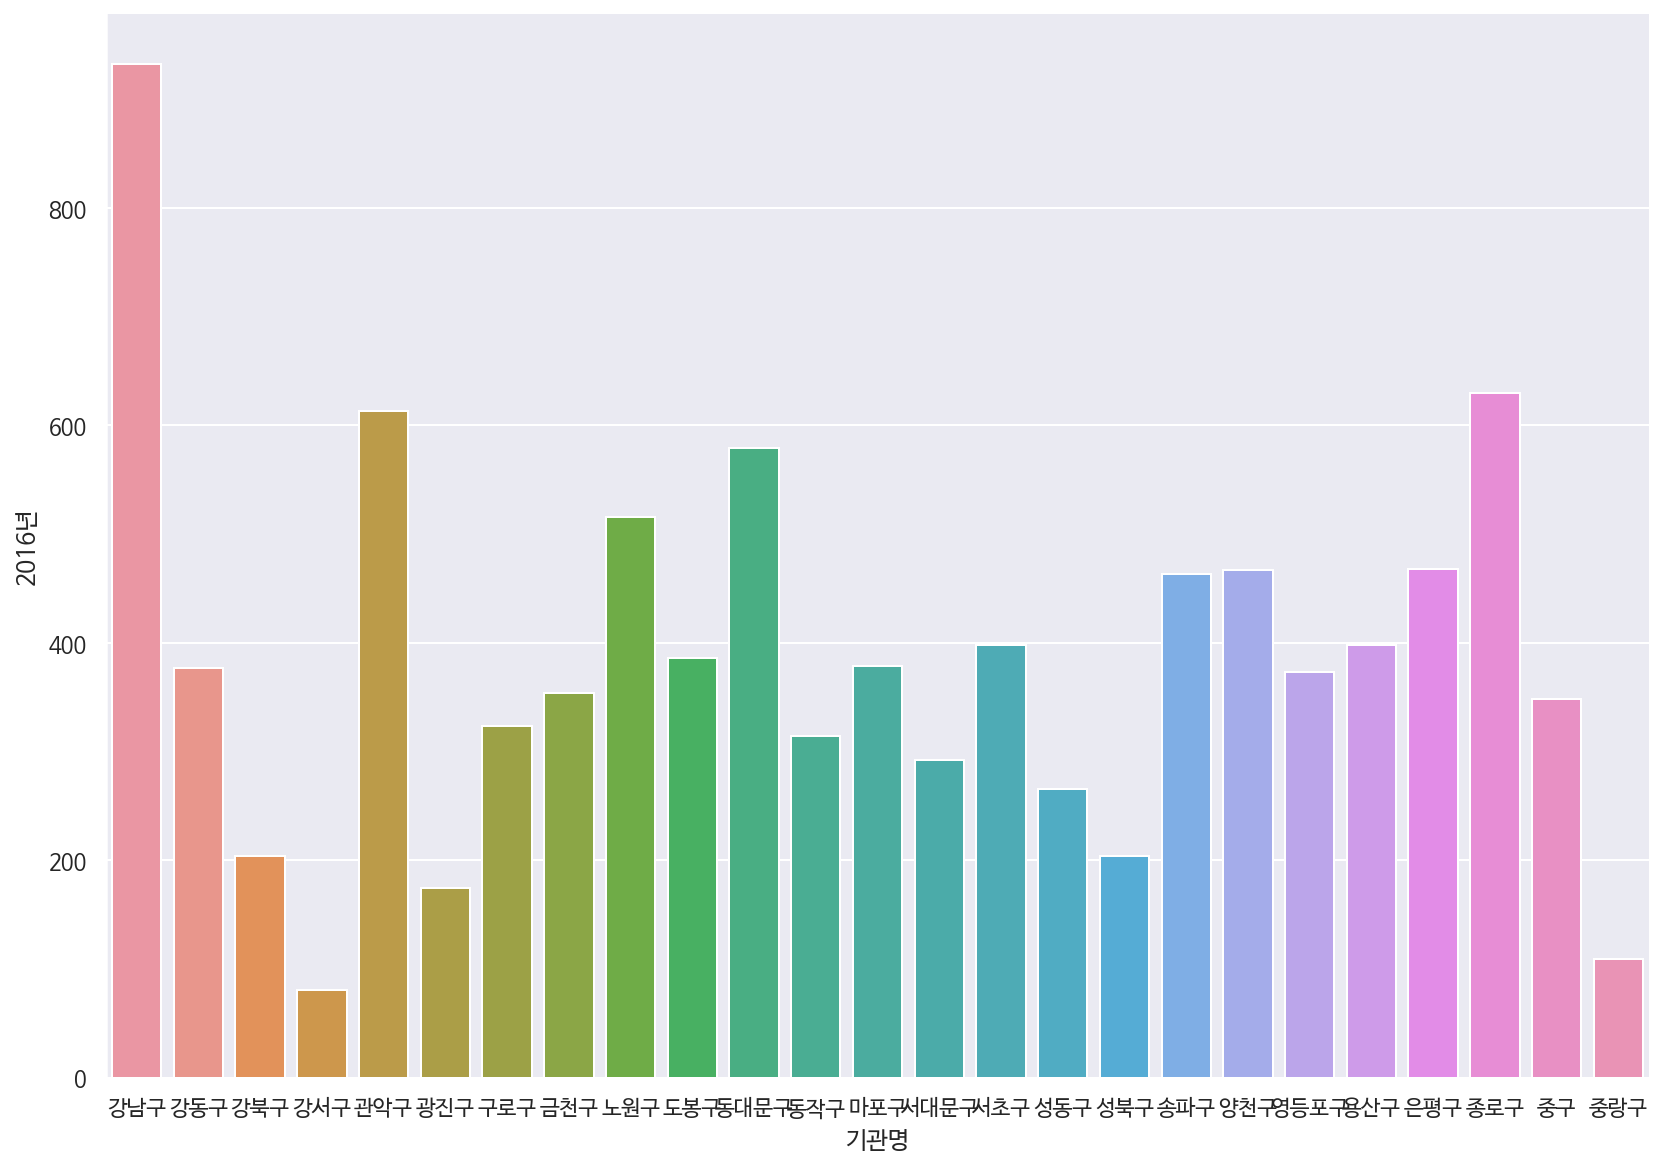

In [32]:
sns.catplot(x='기관명',y='2016년',kind='bar',data=df2, height=8.27, aspect=11.7/8.27 )
plt.show()